In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
train_df = pd.read_csv('Train.csv')
test_final_df=pd.read_csv('TEST_FINAL.csv')

## High level overview of the dataset

#### Inspect the first few rows of each dataset

In [3]:
train_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
test_final_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [5]:
test_final_df.shape

(22265, 8)

#### Get basic info of each dataset

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


The datatypes are assigned properly

In [7]:
train_df.isnull().sum()/len(train_df) *100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
#Order           0.0
Sales            0.0
dtype: float64

#### Checking for missing values

In [8]:
test_final_df.isnull().sum()/len(train_df) *100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
dtype: float64

In [9]:
train_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,188340,188340,T1000001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_id,188340.0,NaN,NaN,NaN,183.0,105.366308,1.0,92.0,183.0,274.0,365.0
Store_Type,188340,4,S1,88752,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Type,188340,5,L1,85140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,188340,4,R1,63984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,188340,516,2018-01-01,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday,188340.0,NaN,NaN,NaN,0.131783,0.338256,0.0,0.0,0.0,0.0,1.0
Discount,188340,2,No,104051,NaN,NaN,NaN,NaN,NaN,NaN,NaN
#Order,188340.0,NaN,NaN,NaN,68.205692,30.467415,0.0,48.0,63.0,82.0,371.0
Sales,188340.0,NaN,NaN,NaN,42784.327982,18456.708302,0.0,30426.0,39678.0,51909.0,247215.0


## Summary statistics

In [10]:
test_final_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,22265,22265,T1188341,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_id,22265.0,NaN,NaN,NaN,183.0,105.368395,1.0,92.0,183.0,274.0,365.0
Store_Type,22265,4,S1,10492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Type,22265,5,L1,10065,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,22265,4,R1,7564,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,22265,61,2019-06-01,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday,22265.0,NaN,NaN,NaN,0.032787,0.178082,0.0,0.0,0.0,0.0,1.0
Discount,22265,2,No,12773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Combine the data
data = pd.concat([train_df, test_final_df], axis=0, join='inner', ignore_index=True)

In [12]:
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes


In [33]:
data = data.rename(columns={'Date': 'Sales_Date'})

In [34]:
train_df.shape

(188340, 10)

In [35]:
test_final_df.shape

(22265, 8)

In [36]:
data.shape

(210605, 8)

In [37]:
data.isnull().sum()/len(data) *100

ID               0.0
Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Sales_Date       0.0
Holiday          0.0
Discount         0.0
dtype: float64

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210605 entries, 0 to 210604
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             210605 non-null  object        
 1   Store_id       210605 non-null  int64         
 2   Store_Type     210605 non-null  object        
 3   Location_Type  210605 non-null  object        
 4   Region_Code    210605 non-null  object        
 5   Sales_Date     210605 non-null  datetime64[ns]
 6   Holiday        210605 non-null  int64         
 7   Discount       210605 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 12.9+ MB


In [39]:
data.describe(include="all").T

C:\Users\5040876\AppData\Local\Temp\ipykernel_18868\3358381446.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include="all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ID,210605,210605,T1000001,1,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_id,210605.0,NaN,NaN,NaN,NaT,NaT,183.0,105.366279,1.0,92.0,183.0,274.0,365.0
Store_Type,210605,4,S1,99244,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location_Type,210605,5,L1,95205,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region_Code,210605,4,R1,71548,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales_Date,210605,577,2018-01-01 00:00:00,365,2018-01-01,2019-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday,210605.0,NaN,NaN,NaN,NaT,NaT,0.121317,0.326496,0.0,0.0,0.0,0.0,1.0
Discount,210605,2,No,116824,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Insights**
- There are 210605 unique users in the train dataset
- There are in total 4 unique Store_type in the dataset with S1 being the most frequent one
- There are in total 5 unique Location_Type of which direct is the most frequent one
- There are in total 4 unique Region_code providers of which direct is the most frequent one
- There are 577 unique Date of which web is the most frequent one

## Train data EDA

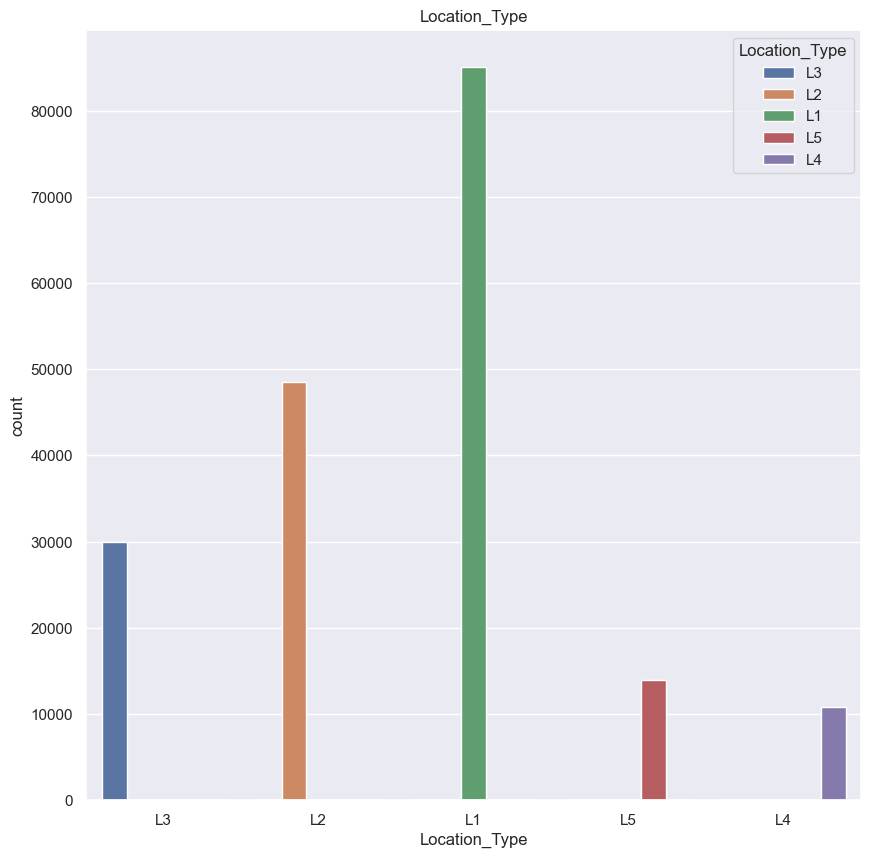

In [40]:
plt.figure(figsize=(10,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="Location_Type", data=train_df,hue="Location_Type")

plt.title("Location_Type")

plt.show()

**Insights**
- The Dataset is highly Imbalanced.
- Majority of Highly sales did in L1 only.

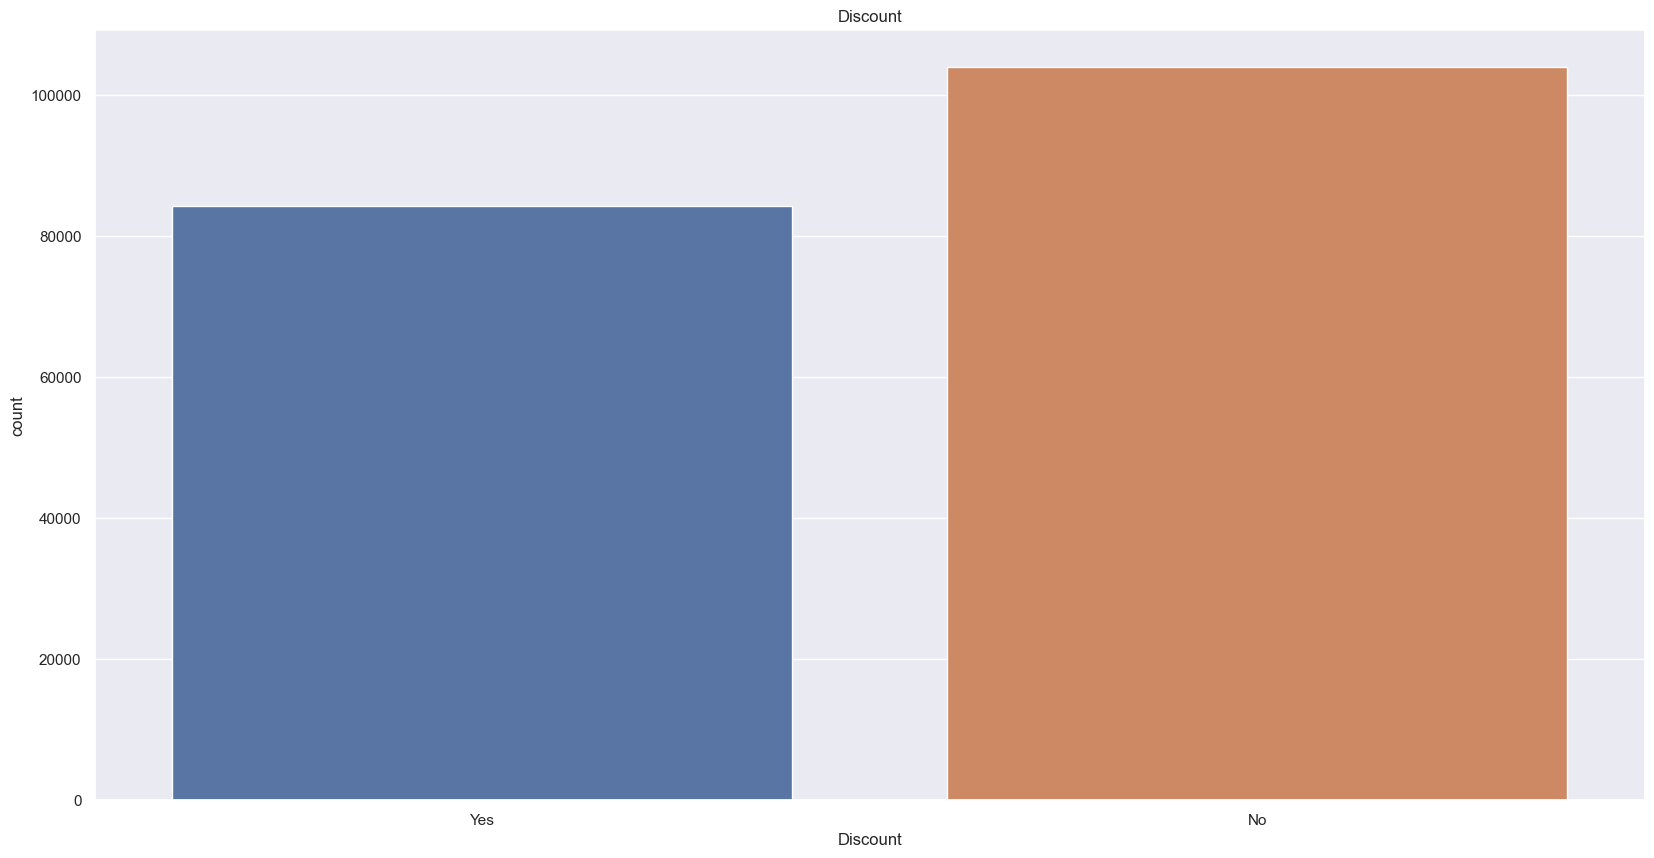

In [41]:
# signup_method share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="Discount", data=train_df)

plt.title("Discount")

plt.show()

**Insight**
- Majority of Saller either Discount from basic or Yes.
- Basic's share is more than double of Yes.
- No share is negligible.

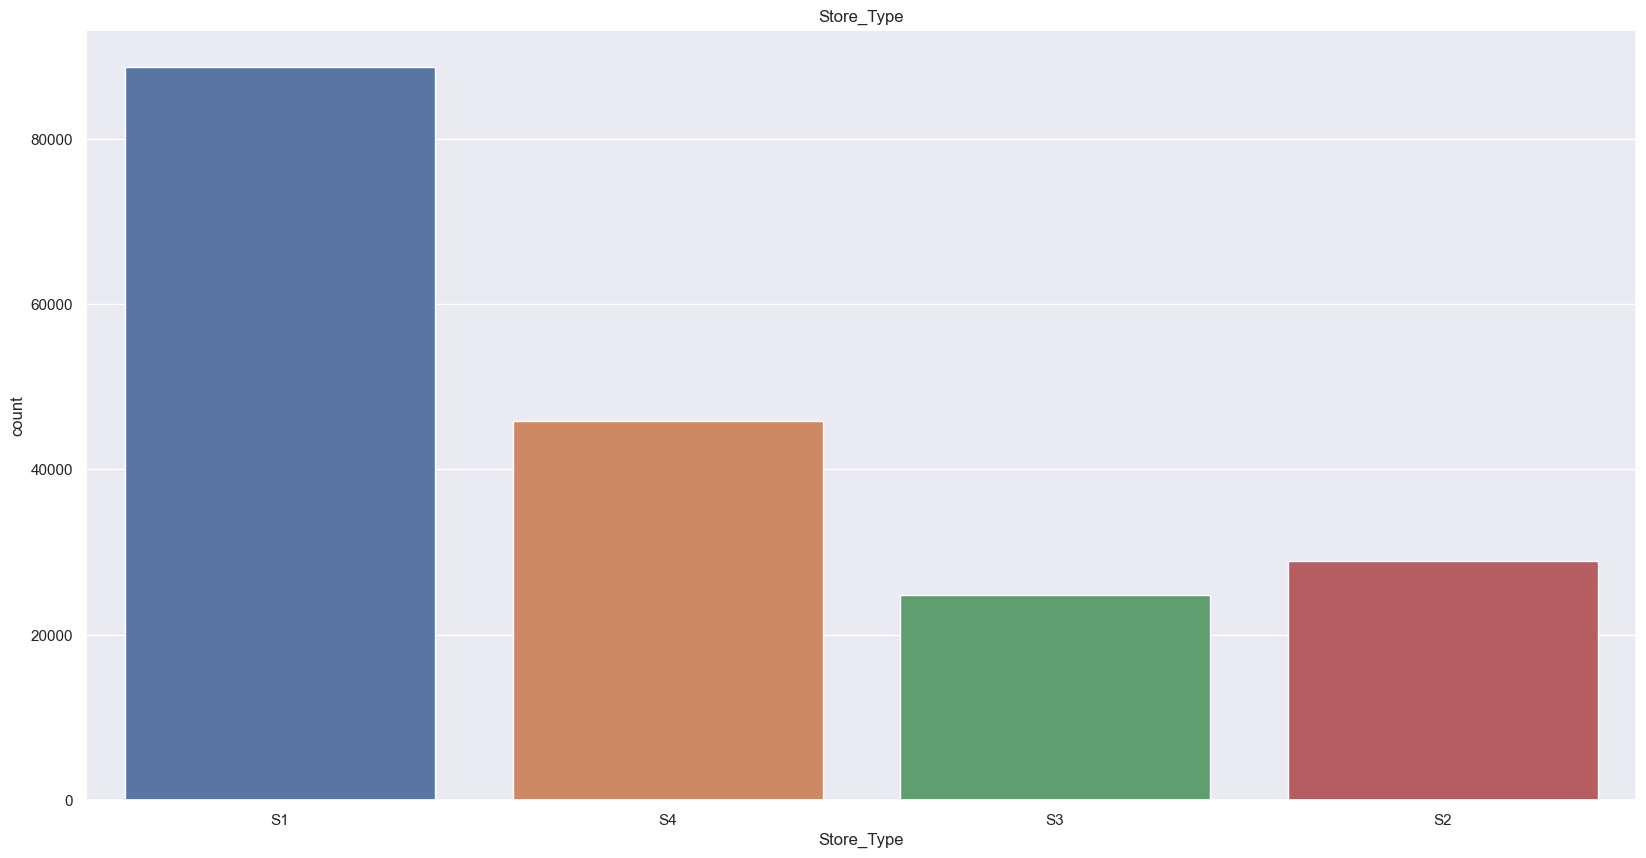

In [42]:
# signup_flow share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="Store_Type", data=train_df)

plt.title("Store_Type")

plt.show()

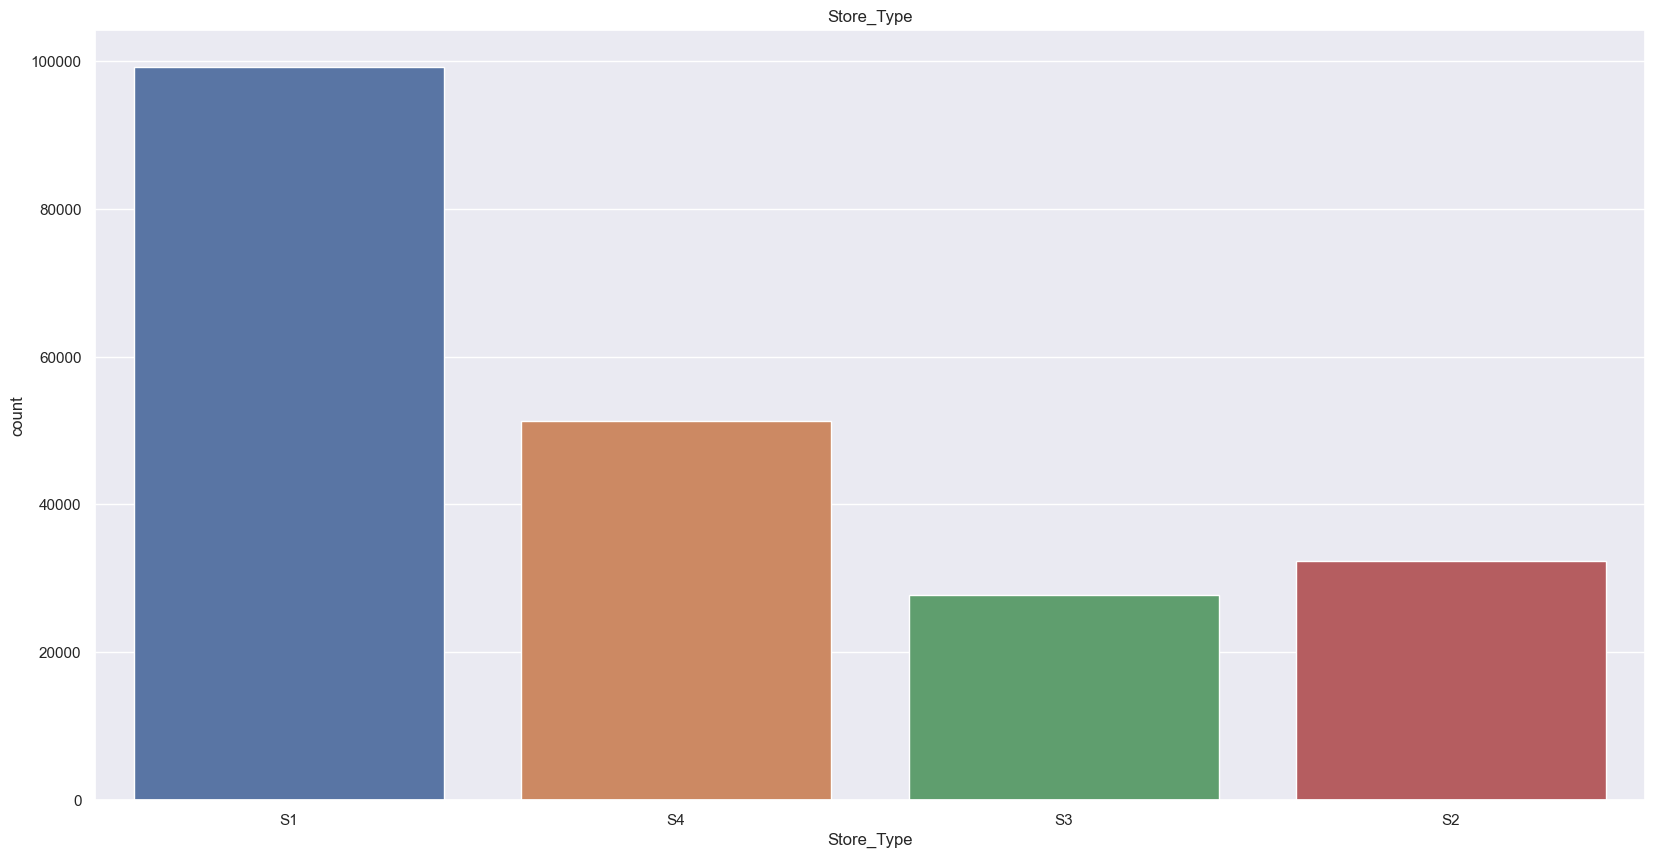

In [43]:
# first_affiliate_tracked share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="Store_Type", data=data)

plt.title("Store_Type")

plt.show()

**Insight**
- Majority of Sales' Store_Type 'S1'.
- 'S3' and 'S2' have the lowest share.

In [44]:
data['Holiday'].value_counts()

0    185055
1     25550
Name: Holiday, dtype: int64

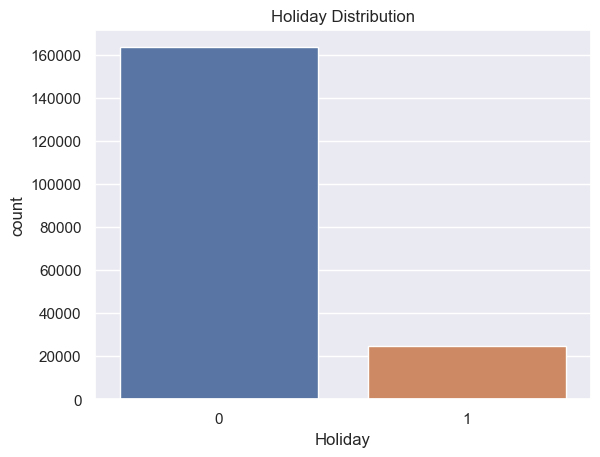

In [45]:
# Plot gender distribution
sns.countplot(x='Holiday', data=train_df)
plt.title('Holiday Distribution')
plt.show()

C:\Users\5040876\AppData\Local\Temp\ipykernel_18868\351914472.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(train_df['Holiday'].dropna(),label="Holiday")


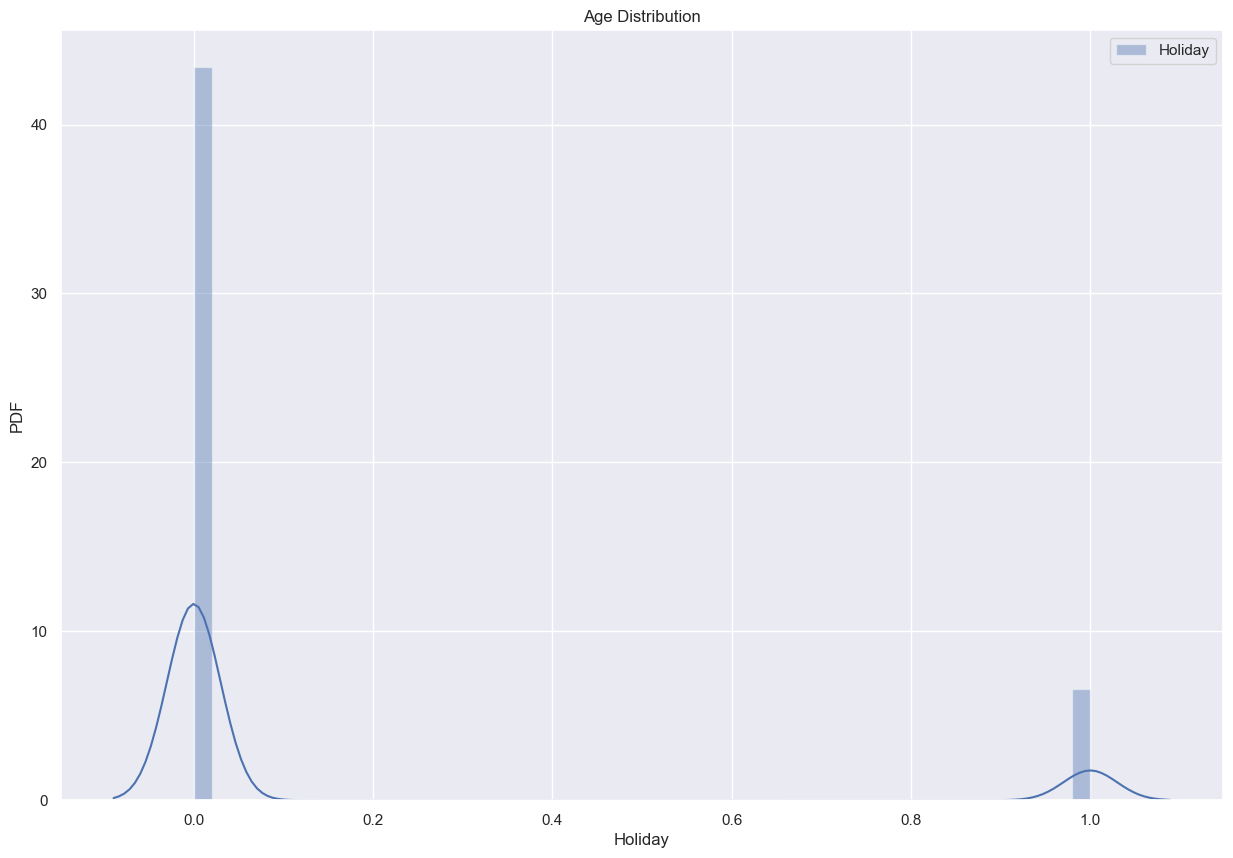

In [46]:
# Age distribution

plt.figure(figsize=(15,10))

ax = sns.distplot(train_df['Holiday'].dropna(),label="Holiday")

ax.set_title('Age Distribution')

ax.set(xlabel='Holiday', ylabel='PDF')

plt.legend()

plt.show()

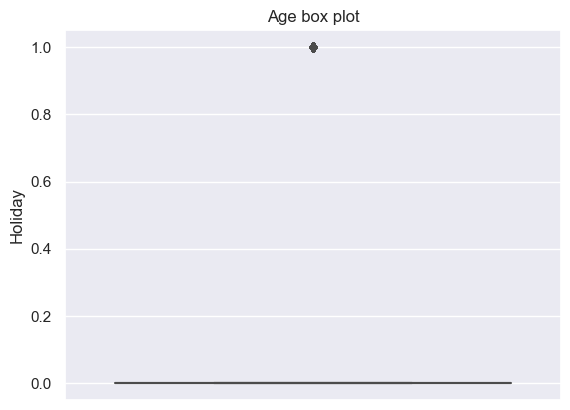

In [47]:
sns.boxplot(y='Holiday',data=data)

plt.title("Age box plot")

plt.show()

The skewed box plot shows us the presence of outliers

In [48]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers

for i in range(0,110,10):

    print("{} percentile value is {}".format(i,np.percentile(train_df['Holiday'].dropna(),i)))

0 percentile value is 0.0
10 percentile value is 0.0
20 percentile value is 0.0
30 percentile value is 0.0
40 percentile value is 0.0
50 percentile value is 0.0
60 percentile value is 0.0
70 percentile value is 0.0
80 percentile value is 0.0
90 percentile value is 1.0
100 percentile value is 1.0


In [49]:
#calculating 90-100th percentile to find a the correct percentile value for removal of outliers

for i in range(90,101,1):

    print("{} percentile value is {}".format(i,np.percentile(train_df['Holiday'].dropna(),i)))

90 percentile value is 1.0
91 percentile value is 1.0
92 percentile value is 1.0
93 percentile value is 1.0
94 percentile value is 1.0
95 percentile value is 1.0
96 percentile value is 1.0
97 percentile value is 1.0
98 percentile value is 1.0
99 percentile value is 1.0
100 percentile value is 1.0


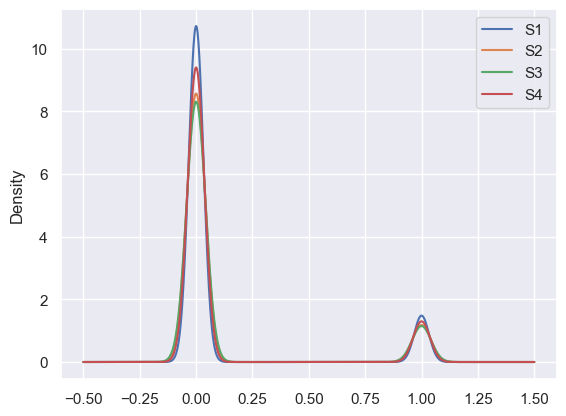

<Figure size 2000x1000 with 0 Axes>

In [50]:
data.groupby("Store_Type").Holiday.plot(kind='kde',legend=True)

plt.figure(figsize=(20,10))

plt.show()

**Insight:**
- We can see that there is not major difference in Holidays when it comes to the Store_Type

In [51]:
data['date_Sale_day'] = data.Sales_Date.dt.weekday

data['date_Sale_month'] = data.Sales_Date.dt.month

data['date_Sale_year'] = data.Sales_Date.dt.year

In [52]:
data['Sales_Date']= data['Sales_Date'].apply(pd.to_datetime)

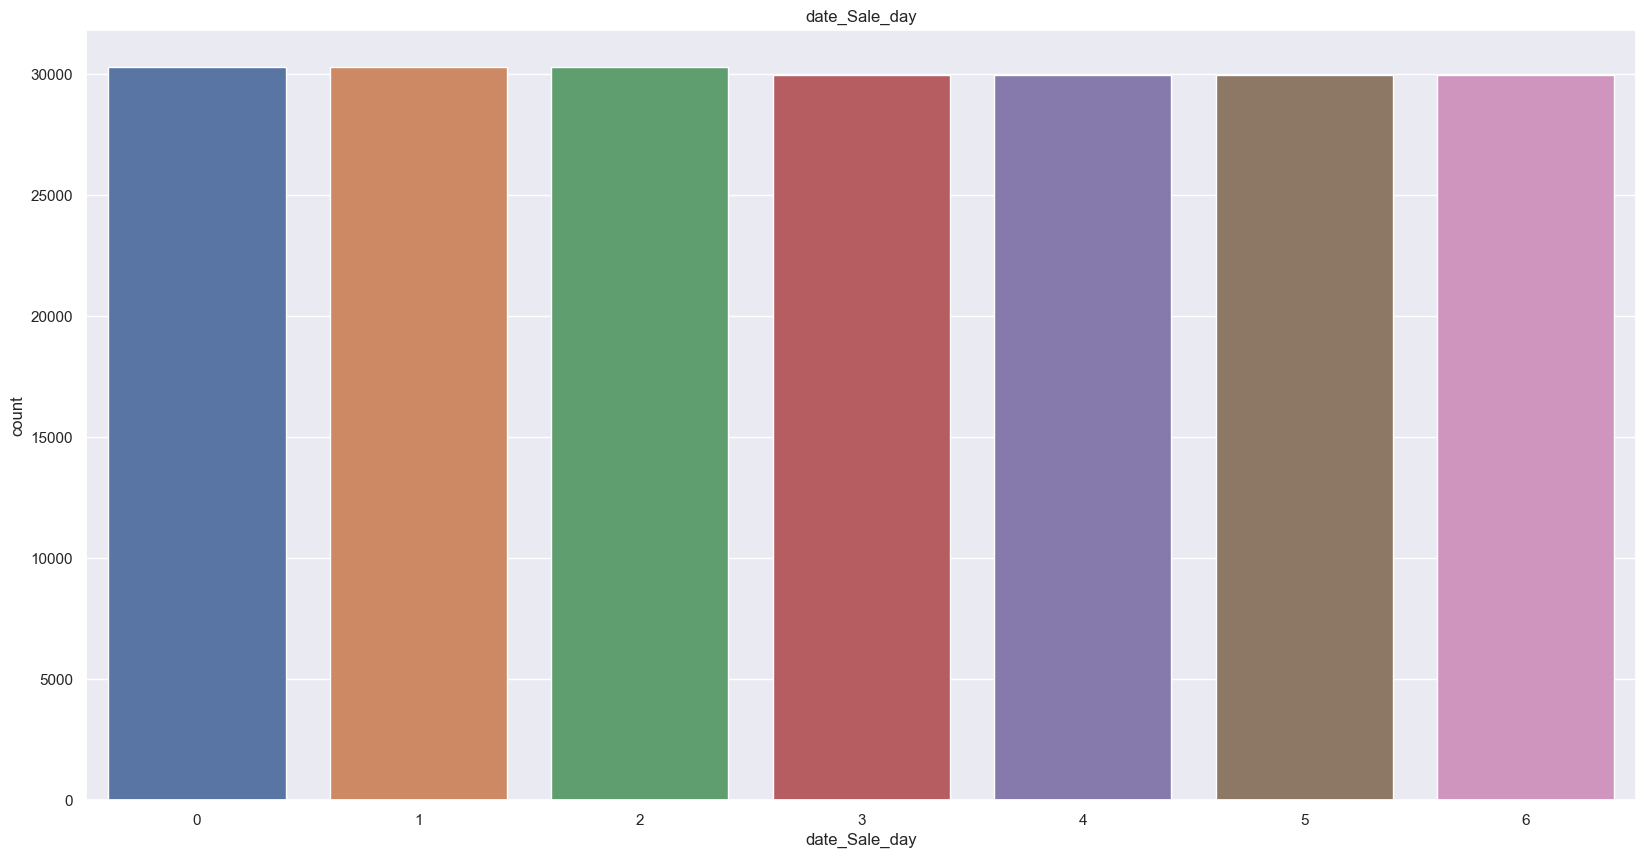

In [53]:
# date_account_created_day share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="date_Sale_day", data=data)

plt.title("date_Sale_day")

plt.show()

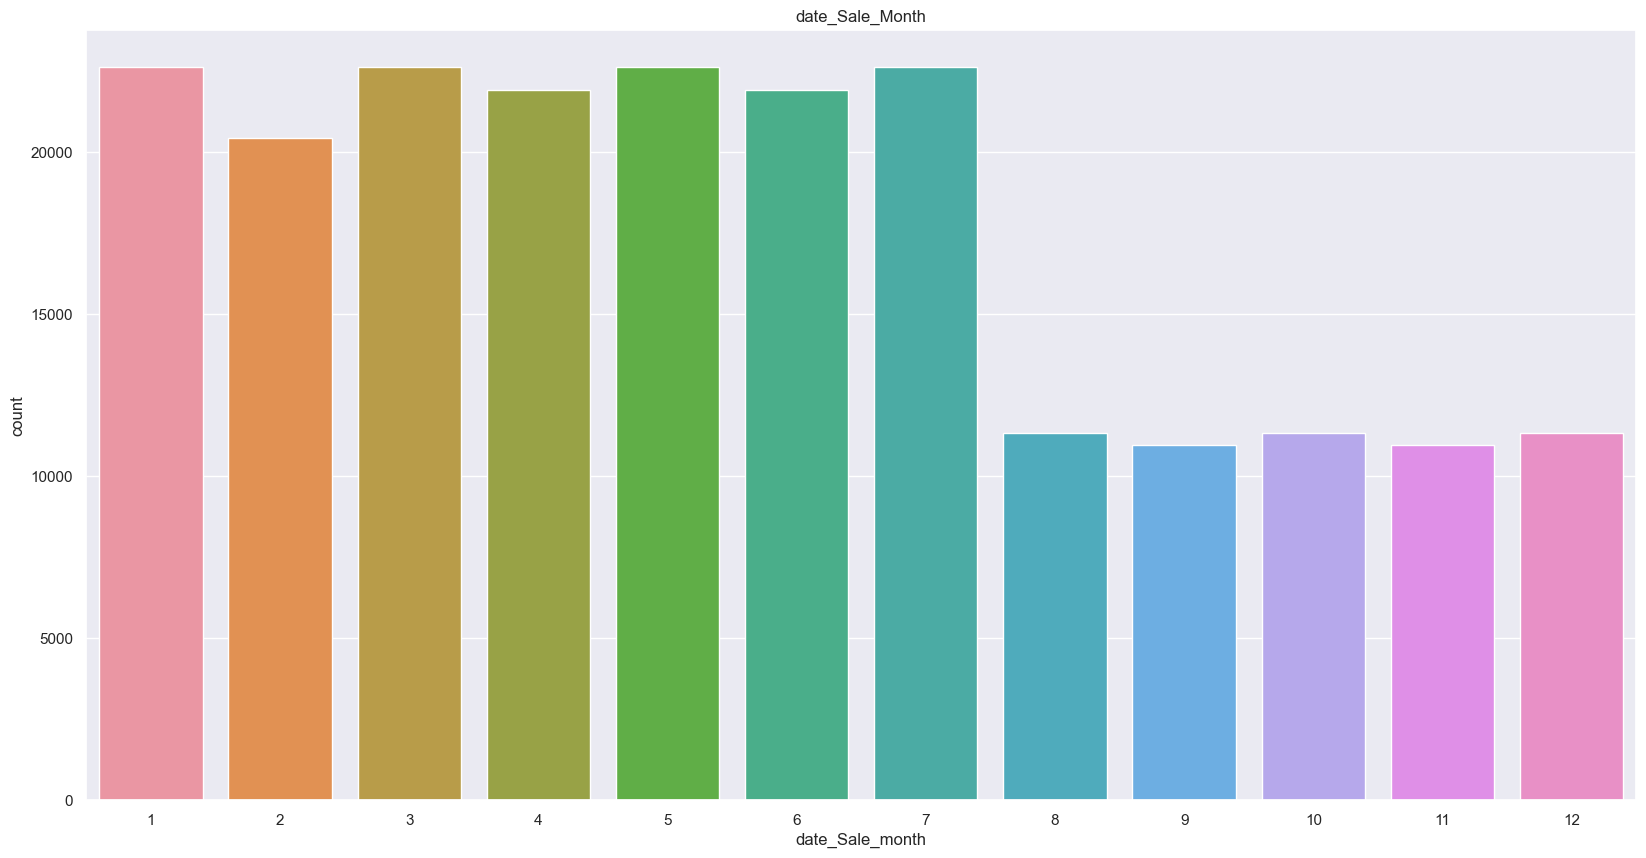

In [54]:
# date_account_created_day share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="date_Sale_month", data=data)

plt.title("date_Sale_Month")

plt.show()

**Insight**
- Most Sales done in Jan, March,May and July.
- Least no of Sales are in August,September, October,November and December.

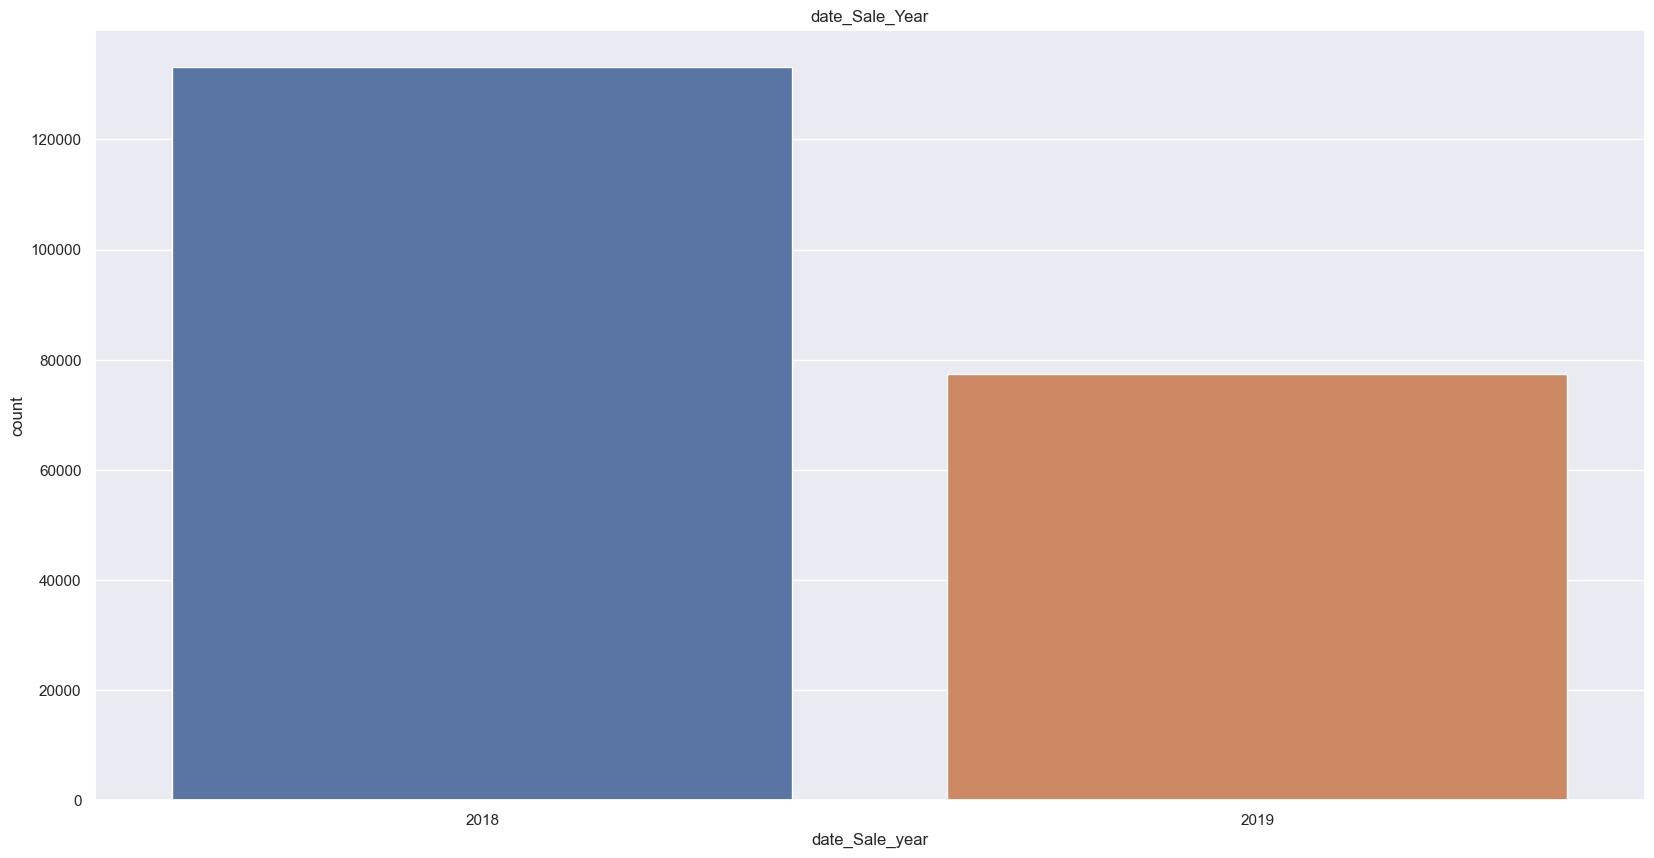

In [55]:
# date_account_created_day share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="date_Sale_year", data=data)

plt.title("date_Sale_Year")

plt.show()

#### Bivariate analysis

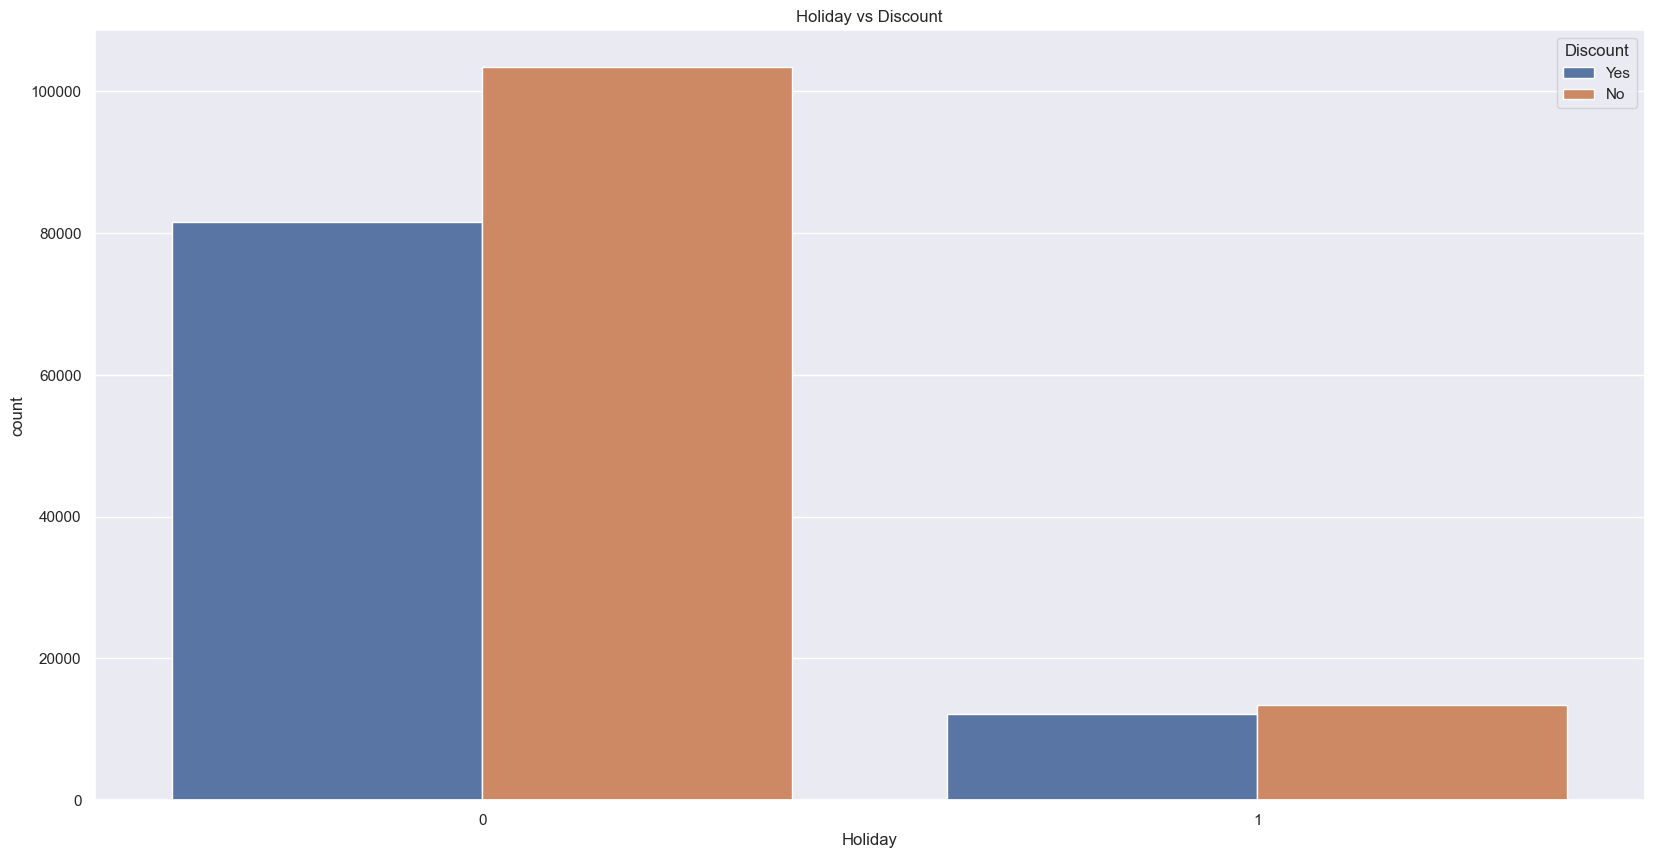

In [56]:
# gender share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="Holiday", hue="Discount", data=data)

plt.title("Holiday vs Discount")

plt.show()

**Insight**
- Majority of Discount uses in Non Holidays.
- Discount's share in Non Holidays Sales is more than Holiday Sales.

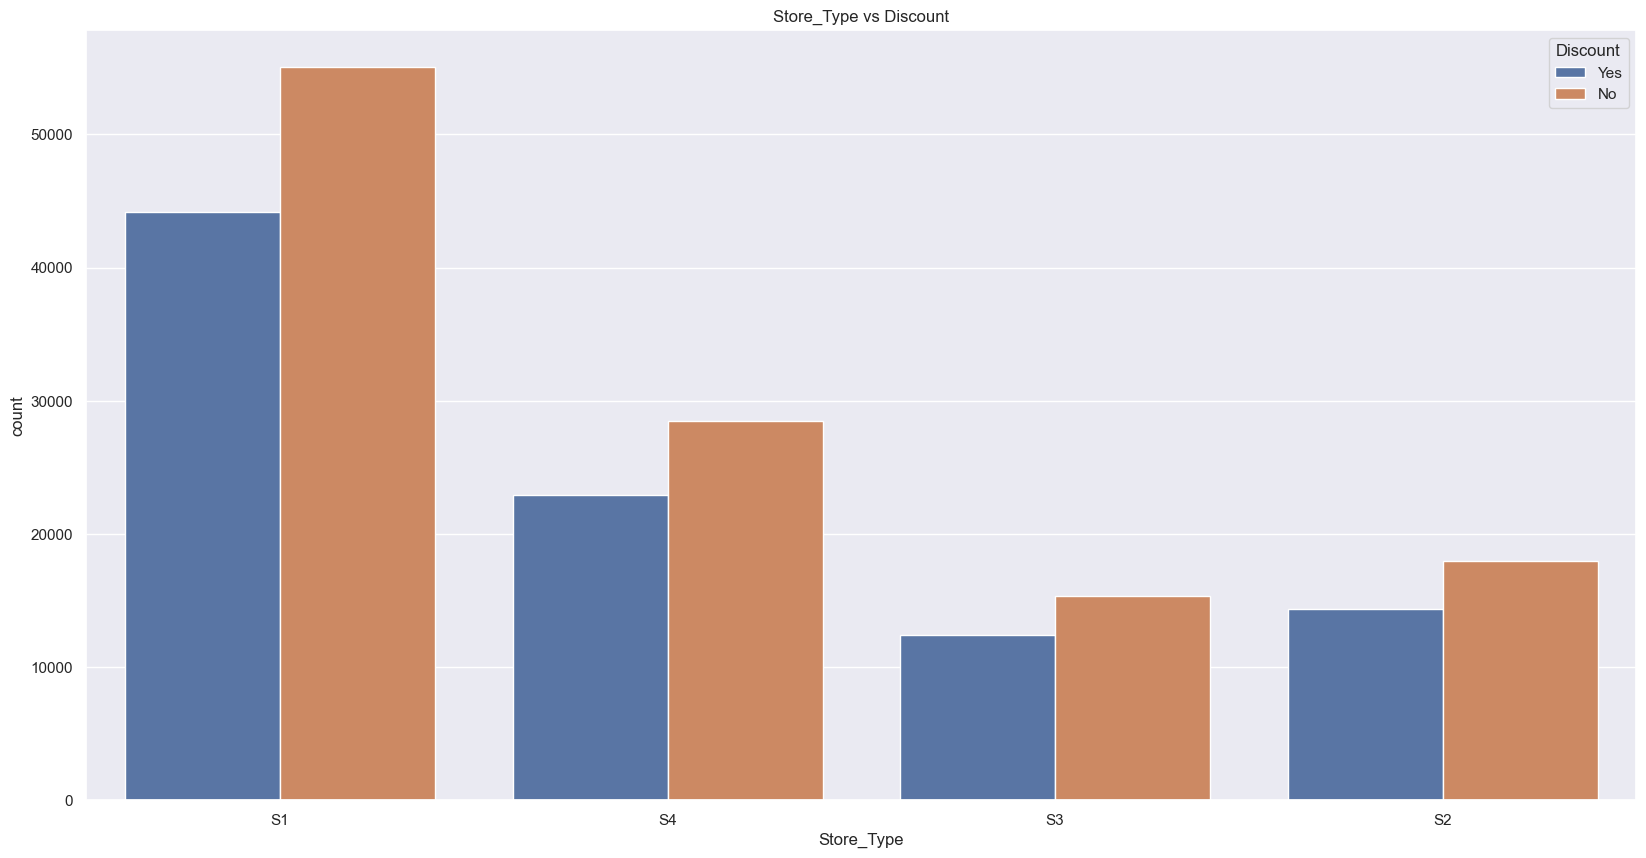

In [57]:
# signup_method share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="Store_Type", hue="Discount", data=data)

plt.title("Store_Type vs Discount")

plt.show()

Negligible Sales happening from S4

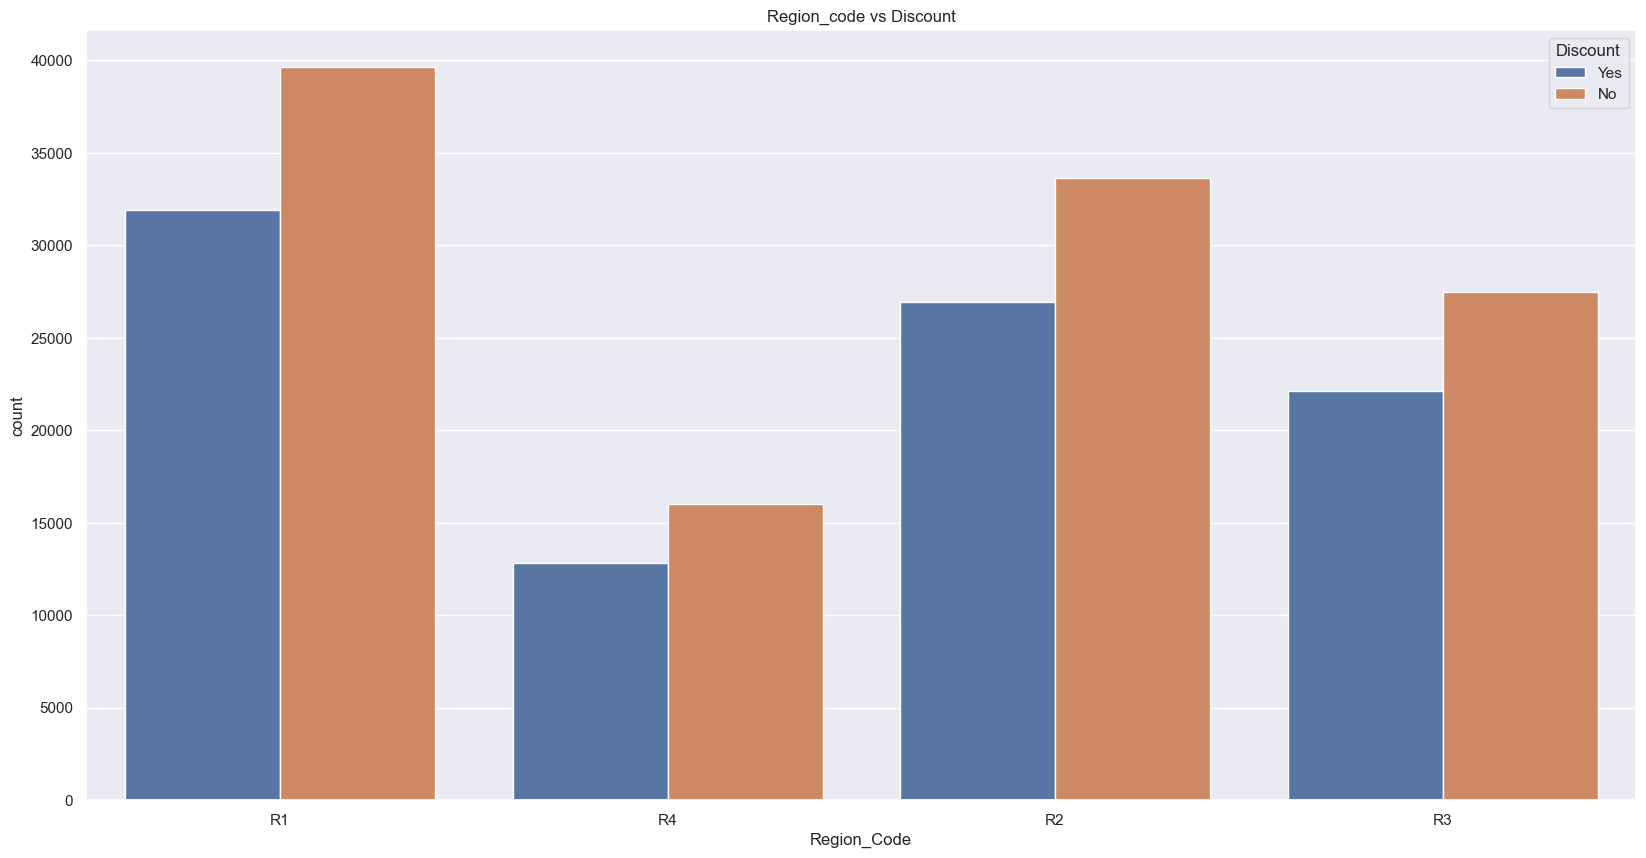

In [58]:
# signup_method share

plt.figure(figsize=(20,10))

sns.set(style="darkgrid")

ax = sns.countplot(x="Region_Code", hue="Discount", data=data)

plt.title("Region_code vs Discount")

plt.show()

Least no of Sales Happen in R4 Region as compared to R1,R2,R3

## TEST_FINAL data EDA

In [59]:
test_final_df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [60]:
# Actions per user
actions_per_user = test_final_df['Store_id'].value_counts()
print(actions_per_user.describe())

count    365.0
mean      61.0
std        0.0
min       61.0
25%       61.0
50%       61.0
75%       61.0
max       61.0
Name: Store_id, dtype: float64


We can see that on an average a sales performs roughly 61 different type of actions

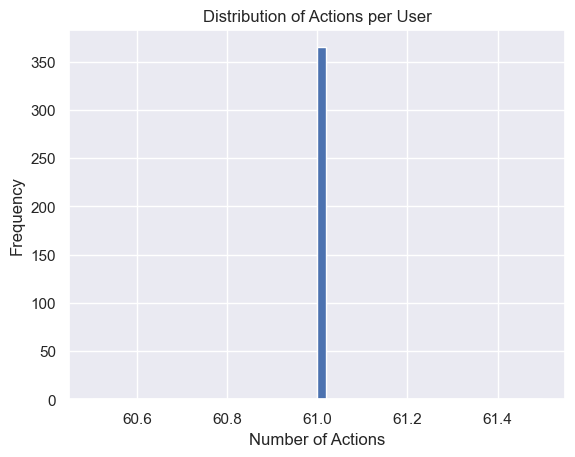

In [61]:
# Plot distribution of actions per user
actions_per_user.plot(kind='hist', bins=50, title='Distribution of Actions per User')
plt.xlabel('Number of Actions')
plt.ylabel('Frequency')
plt.show()

In [62]:
# Top actions
top_actions = test_final_df['Store_Type'].value_counts().head(10)
print(top_actions)

S1    10492
S4     5429
S2     3416
S3     2928
Name: Store_Type, dtype: int64


Show is the most performed Location type by orders

In [63]:
# Distribution of action types
action_types = test_final_df["Location_Type"].value_counts()
print(action_types)

L1    10065
L2     5734
L3     3538
L5     1647
L4     1281
Name: Location_Type, dtype: int64


The most frequently performed action_type is view action this could be viewing the property

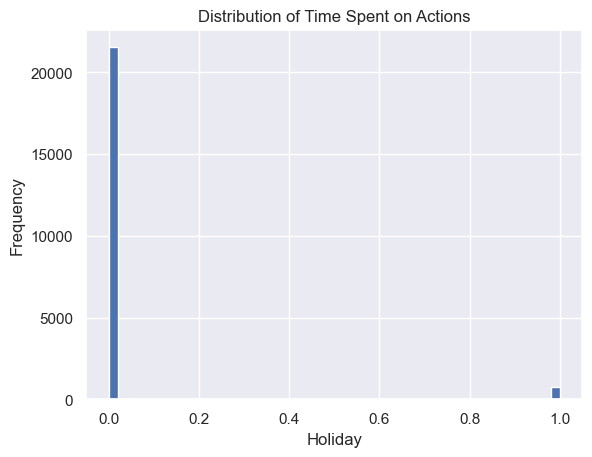

In [64]:
# Distribution of secs_elapsed
test_final_df['Holiday'].plot(kind='hist', bins=50, title='Distribution of Time Spent on Actions')
plt.xlabel('Holiday')
plt.ylabel('Frequency')
plt.show()

Discount
No     0.022313
Yes    0.046882
Name: Holiday, dtype: float64


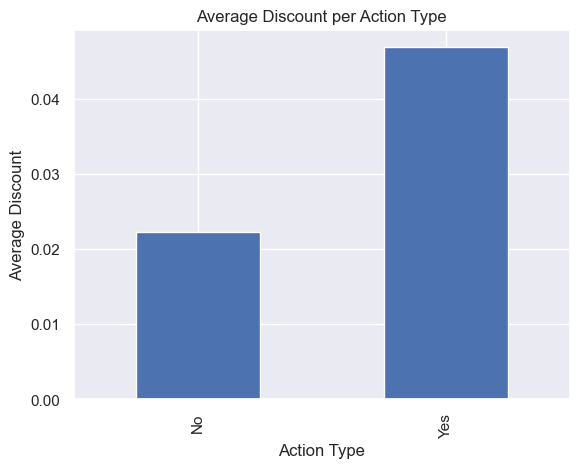

In [65]:
# Average Discount per action type
time_per_Store_Type = test_final_df.groupby('Discount')['Holiday'].mean()
print(time_per_Store_Type)

# Plot average time spent per action type
time_per_Store_Type.plot(kind='bar', title='Average Discount per Action Type')
plt.xlabel('Action Type')
plt.ylabel('Average Discount')
plt.show()

Sales tend to Discount more on an average on Yes type followed by No action type

In [66]:
# Sequence of actions
user_actions = test_final_df.groupby('ID')['Discount'].apply(list)

# Example: View the first few user action sequences
print(user_actions.head())

ID
T1188341    [No]
T1188342    [No]
T1188343    [No]
T1188344    [No]
T1188345    [No]
Name: Discount, dtype: object


In [67]:
from collections import Counter

# Flatten the list of action sequences to find common sequences
action_sequences = user_actions.apply(lambda x: tuple(x)).tolist()
common_sequences = Counter(action_sequences).most_common(10)

print("Most Common Action Sequences:")
for sequence, count in common_sequences:
    print(f"Sequence: {sequence} | Count: {count}")

Most Common Action Sequences:
Sequence: ('No',) | Count: 12773
Sequence: ('Yes',) | Count: 9492


In [68]:
# Extract the first action of each sequence
starting_actions = user_actions.apply(lambda x: x[0] if x else None)

# Count the most common starting actions
common_starting_actions = starting_actions.value_counts().head(10)

print("Most Common Starting Actions:")
print(common_starting_actions)

Most Common Starting Actions:
No     12773
Yes     9492
Name: Discount, dtype: int64


In [69]:
# Extract the last action of each sequence
ending_actions = user_actions.apply(lambda x: x[-1] if x else None)

# Count the most common ending actions
common_ending_actions = ending_actions.value_counts().head(10)

print("Most Common Ending Actions:")
print(common_ending_actions)

Most Common Ending Actions:
No     12773
Yes     9492
Name: Discount, dtype: int64


## Hypothesis testing

**Hypothesis 1:** Discount offering discounts will have significantly higher sales than Discount not offering discounts.

- Null Hypothesis (H0): Stores offering Discounts has no effect on offering Sales rate.
- Alternative Hypothesis (H1): Stores offering Discounts the offering Sales rate.

In [70]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(train_df['Discount'], train_df['Sales'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-square test statistic: {chi2}')
print(f'p-value: {p}')

Chi-square test statistic: 66628.99777526941
p-value: 0.0


**Inference:**
The extremely low p-value (much less than 0.05) suggests that there is a statistically significant association between the DIscount and no Discount rate. This means that the method a sales uses to Discount is likely related to whether or not they make a order, and possibly to which Sales they book.

**Hypothesis 2:** The type of Holiday used for the first activity influences the Sales.

- Null Hypothesis (H0): The Holiday has no effect on the Sales.
- Alternative Hypothesis (H1): The Holiday influences the Sales.

In [71]:
# Create a contingency table
contingency_table_device = pd.crosstab(train_df['Holiday'], train_df['Sales'])

# Perform chi-square test
chi2_device, p_device, dof_device, expected_device = chi2_contingency(contingency_table_device)

print(f'Chi-square test statistic: {chi2_device}')
print(f'p-value: {p_device}')

Chi-square test statistic: 163807.752778182
p-value: 0.0


**Inference:**
The p-value of 0.0 (less than 0.05) indicates a very strong statistically significant relationship between the Holiday type used for the first activity and the Order. This suggests that the type of Holiday sales use for their initial interaction with Sales forecasting can significantly influence their Holidays.

**Hypothesis 3:** There is a significant difference in the average Order of sales who order to Region code.

- Null Hypothesis (H0): The average Orders of sales does not differ by Region Code.
- Alternative Hypothesis (H1): The average Order of sales differs by Region Code.

Since we have one numerical dependent variable Discount and an independent categorical feature with more than 2 categories one way ANOVA is what we'll use to test the hypothesis but to implement the One-way ANOVA test, we need to make sure that they are satisfying certain conditions:

1. Data should be normally distributed (i.e, Gaussian)

2. Data should be independent across each record

3. Equal variance in different groups

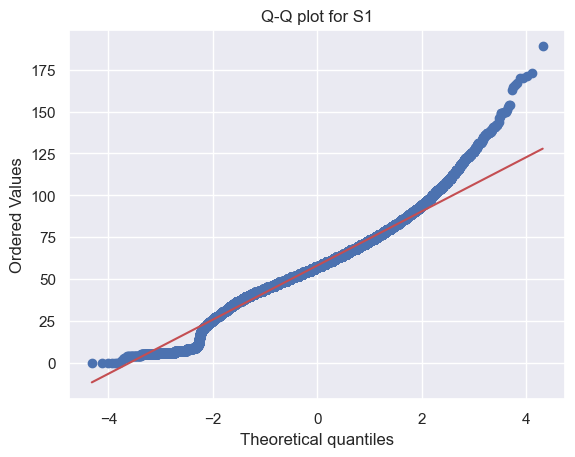

C:\Users\5040876\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-Wilk test for S1: W=0.977761447429657, p-value=0.0


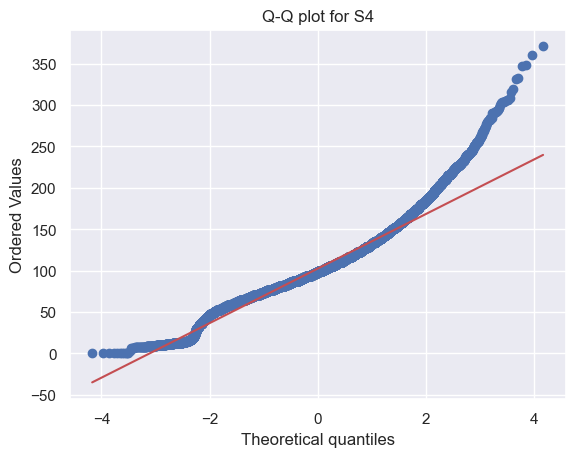

Shapiro-Wilk test for S4: W=0.9537136554718018, p-value=0.0


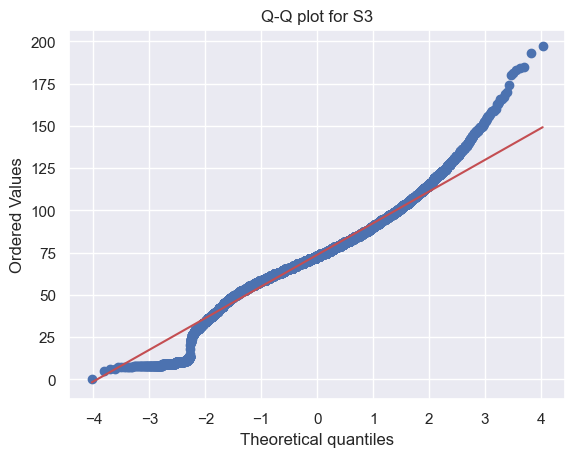

Shapiro-Wilk test for S3: W=0.9707973599433899, p-value=0.0


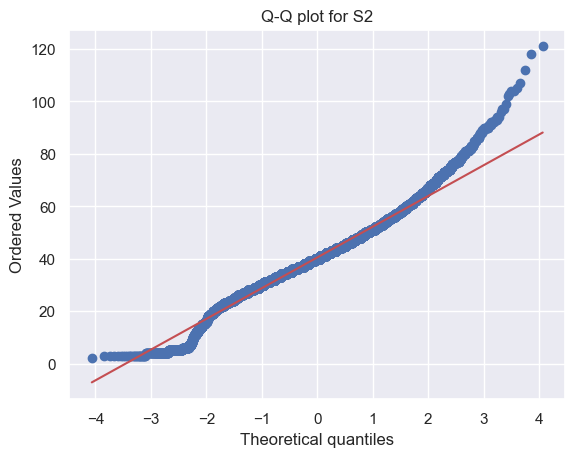

Shapiro-Wilk test for S2: W=0.9808963537216187, p-value=0.0


In [72]:
import scipy.stats as stats

# Hypothesis 3 data extraction
df_hypothesis3 = train_df[['#Order', 'Store_Type']].dropna()

# Check for normality using Q-Q plot and Shapiro-Wilk test
for country in df_hypothesis3['Store_Type'].unique():
    country_data = df_hypothesis3[df_hypothesis3['Store_Type'] == country]['#Order']
    stats.probplot(country_data, dist="norm", plot=plt)
    plt.title(f'Q-Q plot for {country}')
    plt.show()
    shapiro_test = stats.shapiro(country_data)
    print(f'Shapiro-Wilk test for {country}: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}')

If we look at the Q-Q plots and the p values from the Shapiro-Wilk test for each of the Store we can see that the the data does not follows the normality assumption

In [73]:
# Check for homogeneity of variances using Levene's test
levene_test = stats.levene(*[df_hypothesis3[df_hypothesis3['Store_Type'] == country]['#Order'] for country in df_hypothesis3['Store_Type'].unique()])
print(f"Levene's test for homogeneity of variances: W={levene_test.statistic}, p-value={levene_test.pvalue}")

Levene's test for homogeneity of variances: W=9427.57393731192, p-value=0.0


We can see from the Levene's test that the p-values is 0 which is very less than 0.05 which indicates that the variaince significantly differes acorss each Store.

We can see that both the asusmptions of the ANOVA test are not met and hence we'll use the KS test for this hypothesis

In [74]:
# Perform KS test for each pair of Region Code
Store = df_hypothesis3['Store_Type'].unique() # Get unique country destinations
ks_test_results = {}

for i, Type1 in enumerate(Store):
    for j, Type2 in enumerate(Store):
        if i < j:
            data1 = df_hypothesis3[df_hypothesis3['Store_Type'] == Type1]['#Order'] # Sales for Type1
            data2 = df_hypothesis3[df_hypothesis3['Store_Type'] == Type2]['#Order'] # Sales for Type2
            ks_test = stats.ks_2samp(data1, data2) #perform KS test
            ks_test_results[f"{Type1} vs {Type2}"] = (ks_test.statistic, ks_test.pvalue)

# Print KS test results
for pair, result in ks_test_results.items():
    print(f"KS test result for {pair}: D={result[0]}, p-value={result[1]}")

KS test result for S1 vs S4: D=0.6969390023557627, p-value=0.0
KS test result for S1 vs S3: D=0.4082818790938045, p-value=0.0
KS test result for S1 vs S2: D=0.5266384339024957, p-value=0.0
KS test result for S4 vs S3: D=0.46577180051098915, p-value=0.0
KS test result for S4 vs S2: D=0.8909949823932708, p-value=0.0
KS test result for S3 vs S2: D=0.7850682908822444, p-value=0.0


**Interpretation and Insights**

**General Insights:**

- Most comparisons have significant differences: This suggests that for most pairs of Stores, the Orders distributions of Sales to those Store are significantly different.
- Some pairs have no significant differences: For example, S1 vs. S4, S3 vs. S2, S4 vs. S2 and S1 vs. S2, p-values greater than 0.05, indicating no significant difference in Sales distributions.


**Hypothesis 4:** Sales preference of the orders affects the Region of the first order.

- Null Hypothesis (H0): Sales preference has no effect on the Region order.
- Alternative Hypothesis (H1): Sales preference affects on the Region order.

In [75]:
# Create a contingency table
contingency_table_language = pd.crosstab(train_df['Sales'], train_df['Region_Code'])

# Perform chi-square test
chi2_language, p_language, dof_language, expected_language = chi2_contingency(contingency_table_language)

print(f'Chi-square test statistic: {chi2_language}')
print(f'p-value: {p_language}')

Chi-square test statistic: 143305.38357328525
p-value: 0.025547232213269707


**Inference:**
The extremely low p-value (much less than 0.05) indicates a statistically significant association between Sales preference and Region. This implies that the preferred Sales of type has a significant impact on their Region.

**Hypothesis 5:** The number of Sales before the first Order is different across different Sales.

- Null Hypothesis (H0): The number of Sales before the first Order does not differ by Sales.
- Alternative Hypothesis (H1): The number of Sales before the Order differs by Sales.

In [76]:
# Calculate the number of sale per order
user_sessions = train_df.groupby('Sales').size().reset_index(name='sales_count')

# Merge with train_id's
train_users_sessions = pd.merge(train_df, user_sessions, left_on='Sales', right_on='Sales', how='left')
train_users_sessions['sales_count'].fillna(0, inplace=True)

# Group by Store_Type
sales_groups = [group['sales_count'].values for name, group in train_users_sessions.groupby('Location_Type')]

In [77]:
# Shapiro-Wilk test for normality on each group
normality_results = {}
for name, group in train_users_sessions.groupby('Location_Type'):
    shapiro_stat, shapiro_p_value = stats.shapiro(group['sales_count'])
    normality_results[name] = (shapiro_stat, shapiro_p_value)
    print(f'{name} - Shapiro-Wilk test statistic: {shapiro_stat}, p-value: {shapiro_p_value}')

L1 - Shapiro-Wilk test statistic: 0.9703049659729004, p-value: 0.0
L2 - Shapiro-Wilk test statistic: 0.9097409844398499, p-value: 0.0
L3 - Shapiro-Wilk test statistic: 0.9713045954704285, p-value: 0.0
L4 - Shapiro-Wilk test statistic: 0.9667580127716064, p-value: 3.5032461608120427e-44
L5 - Shapiro-Wilk test statistic: 0.9461737871170044, p-value: 0.0


C:\Users\5040876\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


We can see that the p-values are less than 0.05 which indicates that the data is not normally distrubuted

In [78]:
# Levene's test for homogeneity of variances
levene_stat, levene_p_value = stats.levene(sales_groups[0], sales_groups[1], sales_groups[2])
print(f'Levene test statistic: {levene_stat}')
print(f'Levene p-value: {levene_p_value}')

Levene test statistic: 307.81581087038774
Levene p-value: 3.700292786186885e-134


The p-value is less than 0.05 which indicates that the varaition across the groups are not equal

Since the assmptions of ANOVA are not met we'll be proceeding with KS test

In [79]:
kruskal_stat, kruskal_p_value = stats.kruskal(sales_groups[0], sales_groups[1], sales_groups[2])
print(f'Kruskal-Wallis H-statistic: {kruskal_stat}')
print(f'Kruskal-Wallis p-value: {kruskal_p_value}')

Kruskal-Wallis H-statistic: 14196.099154061052
Kruskal-Wallis p-value: 0.0


The Kruskal-Wallis test results indicate that the number of sales before the first booking differs significantly across different Location_Type.

**Summary**
For all four hypotheses, the test results show highly significant p-values, indicating strong evidence that the variables tested are associated with one another. Specifically:

- The Location_Type affects the sales rate and possibly the location.
- The sales type used impacts the orders.
- Most pairs of Store, the order distributions of sales to those types are significantly different and some pairs have no significant differences.
- orders preference is associated with the sales.
- Number of orders before the first booking differs significantly across different store types.